In [644]:
# !pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import spotipy.util as util
import numpy as np
from collections import defaultdict

cid ="baca9371d5f8409a85ffee343639df22" 
secret = "75d20d82245b445882cafae68e3442aa"

client_credentials_manager = SpotifyClientCredentials(client_id=cid,client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
name = "{A$AP Rocky}" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/13ubrt8QOOCPljQ2FL1Kca'},
  'href': 'https://api.spotify.com/v1/artists/13ubrt8QOOCPljQ2FL1Kca',
  'id': '13ubrt8QOOCPljQ2FL1Kca',
  'name': 'A$AP Rocky',
  'type': 'artist',
  'uri': 'spotify:artist:13ubrt8QOOCPljQ2FL1Kca'}]

In [645]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:3MATDdrpHmQCmuOcozZjDa',
 'spotify:album:4McL6uB0omKrLAsZtXQwDA',
 'spotify:album:5b6HBIqolYQCK29Ma4tVqP',
 'spotify:album:3arNdjotCvtiiLFfjKngMc',
 'spotify:album:6MGLjgaBfHSsWl1A06mW4j',
 'spotify:album:6rzMufuu8sLkIizM4q9c7J',
 'spotify:album:5WHY4T7LcWAJPb1ddChotC']

In [646]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [647]:
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album TESTING songs has been added to spotify_albums dictionary
Album TESTING songs has been added to spotify_albums dictionary
Album AT.LONG.LAST.A$AP songs has been added to spotify_albums dictionary
Album AT.LONG.LAST.A$AP songs has been added to spotify_albums dictionary
Album AT.LONG.LAST.A$AP songs has been added to spotify_albums dictionary
Album LONG.LIVE.A$AP (Deluxe Version) songs has been added to spotify_albums dictionary
Album LONG.LIVE.A$AP songs has been added to spotify_albums dictionary


In [648]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [649]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 29.552114963531494 seconds


In [650]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

115

In [651]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,TESTING,1,57q6BgYP4gN6hPQViCB3um,Distorted Records,spotify:track:57q6BgYP4gN6hPQViCB3um,0.1370,0.655,0.869,0.000024,0.3120,-4.344,0.212,135.763,0.0815,59
1,TESTING,2,3oHkMCVJyOcjg5FhfLc2Rq,A$AP Forever REMIX,spotify:track:3oHkMCVJyOcjg5FhfLc2Rq,0.2990,0.322,0.754,0.000000,0.1360,-6.416,0.275,62.839,0.3920,67
2,TESTING,3,52eYVUkFTOVozbVFIaFrnV,Tony Tone,spotify:track:52eYVUkFTOVozbVFIaFrnV,0.1390,0.534,0.783,0.000000,0.0831,-4.013,0.261,69.716,0.3340,64
3,TESTING,4,1AqemxWsT0iGg5Lvkm16Bt,Fukk Sleep,spotify:track:1AqemxWsT0iGg5Lvkm16Bt,0.4430,0.793,0.412,0.000074,0.2190,-9.305,0.364,135.937,0.3070,73
4,TESTING,5,7ycWLEP1GsNjVvcjawXz3z,Praise The Lord (Da Shine) (feat. Skepta),spotify:track:7ycWLEP1GsNjVvcjawXz3z,0.0609,0.850,0.569,0.081600,0.1000,-8.152,0.136,80.020,0.2940,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,LONG.LIVE.A$AP,8,2DP5IaZ0WEUhibImafxF1Y,Wild for the Night (feat. Skrillex & Birdy Nam...,spotify:track:2DP5IaZ0WEUhibImafxF1Y,0.0539,0.750,0.856,0.000000,0.1140,-4.193,0.325,139.973,0.7510,5
111,LONG.LIVE.A$AP,9,3MhUu5CEC5SYcleNZ2zUmx,"1Train (feat. Kendrick Lamar, Joey Bada$$, Yel...",spotify:track:3MhUu5CEC5SYcleNZ2zUmx,0.3260,0.600,0.859,0.000000,0.6830,-3.508,0.336,83.887,0.8010,3
112,LONG.LIVE.A$AP,10,71B3Z16BehxNMn0yZTqxpt,Fashion Killa,spotify:track:71B3Z16BehxNMn0yZTqxpt,0.2830,0.796,0.826,0.000000,0.5540,-5.203,0.142,140.045,0.8520,4
113,LONG.LIVE.A$AP,11,1rEoNRxhJxeqAfWCI9k2Bb,Phoenix,spotify:track:1rEoNRxhJxeqAfWCI9k2Bb,0.5880,0.634,0.494,0.005860,0.0807,-11.296,0.131,144.130,0.4790,0


In [652]:

# findal_df=df.drop_duplicates('name').sort_index()
final_df = df.sort_values('popularity', ascending=False)[:20].drop_duplicates('name')
final_df

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
4,TESTING,5,7ycWLEP1GsNjVvcjawXz3z,Praise The Lord (Da Shine) (feat. Skepta),spotify:track:7ycWLEP1GsNjVvcjawXz3z,0.060900,0.850,0.569,0.081600,0.1000,-8.152,0.1360,80.020,0.2940,84
92,LONG.LIVE.A$AP (Deluxe Version),7,4X5f3vT8MRuXF68pfjNte5,"F**kin' Problems (feat. Drake, 2 Chainz & Kend...",spotify:track:4X5f3vT8MRuXF68pfjNte5,0.024000,0.852,0.693,0.000000,0.1100,-6.870,0.2740,95.967,0.6600,77
53,AT.LONG.LAST.A$AP,4,4S7YHmlWwfwArgd8LfSPud,L$D,spotify:track:4S7YHmlWwfwArgd8LfSPud,0.193000,0.598,0.252,0.138000,0.0992,-15.086,0.0647,120.060,0.0352,76
66,AT.LONG.LAST.A$AP,17,2N3U8uTYhjX2KwGT0pf5x0,Everyday,spotify:track:2N3U8uTYhjX2KwGT0pf5x0,0.010100,0.394,0.661,0.000000,0.3430,-8.684,0.1930,149.822,0.3350,76
3,TESTING,4,1AqemxWsT0iGg5Lvkm16Bt,Fukk Sleep,spotify:track:1AqemxWsT0iGg5Lvkm16Bt,0.443000,0.793,0.412,0.000074,0.2190,-9.305,0.3640,135.937,0.3070,73
56,AT.LONG.LAST.A$AP,7,1j6kDJttn6wbVyMaM42Nxm,Lord Pretty Flacko Jodye 2 (LPFJ2),spotify:track:1j6kDJttn6wbVyMaM42Nxm,0.012200,0.489,0.718,0.000000,0.0546,-5.989,0.1100,207.986,0.0568,70
93,LONG.LIVE.A$AP (Deluxe Version),8,2rzBvHM9h36Tpdj7Jdajka,Wild for the Night (feat. Skrillex & Birdy Nam...,spotify:track:2rzBvHM9h36Tpdj7Jdajka,0.048300,0.759,0.849,0.000000,0.1210,-4.234,0.3350,140.001,0.6810,70
14,TESTING,15,2MF4HtZHBoUliOi9nOAbS0,Purity,spotify:track:2MF4HtZHBoUliOi9nOAbS0,0.832000,0.594,0.370,0.000000,0.1080,-11.674,0.4040,135.391,0.3090,69
51,AT.LONG.LAST.A$AP,2,0rBMP6VVGRgwnzZCLpijyl,Canal St.,spotify:track:0rBMP6VVGRgwnzZCLpijyl,0.308000,0.696,0.583,0.000000,0.0964,-9.351,0.3010,137.079,0.5240,68
87,LONG.LIVE.A$AP (Deluxe Version),2,31G9RaSaDOI2NWcpnIp734,Goldie,spotify:track:31G9RaSaDOI2NWcpnIp734,0.225000,0.697,0.848,0.000046,0.4930,-4.953,0.2490,81.956,0.7330,68


In [554]:
def match(song1,complete):
    check=[]
    for x in complete:
        if song1 in x["title"]:
            check.append(x["title"])
        
    if (check):
        return min(check, key=len) 
    else:
        return check[0]
#     song2="".join((char for char in song2 if char not in string.punctuation))
#     song1="".join((char for char in song1 if char not in string.punctuation))
#     song1=song1.split()
#     song2=song2.split()
#     intersect =set(song1).intersection(set(song2))
#     if len(set(song1))==len(set(song2)):
#         return song1
#     song2="".join((char for char in song2 if char not in string.punctuation))

In [555]:
match("3005",complete_sentiment)

'V3005'

In [556]:
"III. Telegraph Ave. ('Oakland' by Lloyd)"

"III. Telegraph Ave. ('Oakland' by Lloyd)"

In [557]:
'III Telegraph Ave ”Oakland” by Lloyd'

'III Telegraph Ave ”Oakland” by Lloyd'

In [558]:
s='3005'
s1="'Secret Track V 3005  Beach Picnic Version'"

In [559]:
match("III. Telegraph Ave. ('Oakland' by Lloyd)",'III Telegraph Ave ”Oakland” by Lloyd')

TypeError: string indices must be integers

In [653]:
# top 10 songs 
# go through the dictionary and create a counter of the top10 songs tokens


from collections import Counter
import math, glob, csv, re, numpy
from matplotlib import pyplot
import json
from collections import defaultdict
import os
import fnmatch
import numpy as np
from datetime import datetime

In [654]:
def find_all(name, path):
    l={}
    for filename in os.listdir(path):
#         print (filename)
        if fnmatch.fnmatch(filename,"*"+name+"*"):
#             print (filename)
#             print (load_album("../"+filename)[0]['release_date'])
            l[filename]=load_album("../male_lyrics/"+filename)[0]['release_date']
#     sorted_songs_artist = sorted(l, key=lambda x: x["release_date"])    
    l={k: v for k, v in sorted(l.items(), key=lambda item: item[1])}
    print (list(l.keys()))
    sortedl=list(l.keys())
    return sortedl

In [655]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.split(",")
            word=word.rstrip()## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [656]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score

#longer paragraphs arent overweighted

In [657]:
word_weights = load_word_weights("bingliu.csv")

In [658]:
# import pandas as pd
# data = pd.read_csv("top10.csv")

import csv

from collections import defaultdict

top10dict=defaultdict(list)
input_file = csv.DictReader(open("top10.csv"))
for row in input_file:
    top10dict[row["author"]].append({"album":row["album"],"song":row["song"],"year":row["year"],"list_count":row["listen_count"]})

In [659]:
def load_album(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    with open(text_file) as json_file:
        data = json.load(json_file)
#         print (type(data))
    ## here's where we actually read the file
#     with open(text_file, encoding="utf-8") as file:
#         print (type(file))
        ## This block reads a file line by line.
        for line in data["songs"]:
#             print (line)
#             print (type(line))
#             print (line[0])
            date=datetime.strptime(line["year"], '%Y-%M-%d')
            title=line['title']
            album=line['album']
            if album in ['Get Well Soon...','Kon the Louis Vuitton Don','I’m Good']:
#                 print (album)
                album="The College Dropout"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            elif album in ['Can’t Tell Me Nothing']:
#                 print (album)
                album="Late Registration"
                print (album,"change") 
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
            else:
                line = line['lyrics'].rstrip()
    #             print (line)
                tokens = word_pattern.findall(line)
                tokens=[x.lower() for x in tokens]
    #             ## turn a list into a word->count map
                paragraph_counts = Counter(tokens)

    #             ## create the paragraph object, with the original text, 
    #             ##  the word counts, and the total score.
    #             print (line['title'])
                paragraphs.append({'title': title,'album':album,'text': line,"release_date":date, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })
    return paragraphs

In [631]:
filenames=find_all("Tyler,","../male_lyrics")

['Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Goblin.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json']


In [720]:
#all albums for the artist

def load_artist(artist):
    
    complete=[]
    filenames=find_all(artist,"../male_lyrics")
    
    
    for file in filenames:
         complete.extend(load_album("../male_lyrics/"+file))
      
    
    return complete

In [721]:
complete_sentiment=load_artist("A$AP")

['Lyrics_A$APRocky{.LIVE-LOVE-A-AP.json', 'Lyrics_A$APRocky{.LONG-LIVE-A-AP.json', 'Lyrics_A$APRocky{.AT-LONG-LAST-A-AP.json', 'Lyrics_A$APRocky{.TESTING.json']


In [722]:
complete_sentiment

[{'title': 'Palace',
  'album': 'LIVE.LOVE.A$AP',
  'text': "Goddamn, how real is this?\nI know them Harlem niggas gon' be feeling this\nEast Coast nigga, but how trill is this?\nStill don't give a shit, my ignorance is still a bliss\nGoddamn, how real is this?\nI know them Harlem niggas gon' be feeling this\nEast Coast nigga, but how trill is this?\nStill don't give a shit, my ignorance is still a bliss\n\nStone cold love, rose gold slugs\nI could afford it, I imported stone cold drugs\nStone cold, rolling stone, I'm a stoned nigga\nWrite it on my tombstone, I was stoned nigga\nDon't remember me as a wannabe New Orleans nigga\nSlash lean sipping, Tennessee nigga, nah\nInfluenced by Houston, hear it in my music\nA trill nigga to the truest, show you how to do this\nMy all gold grills give her cold chills\nSaid she's got a coke feel cause I'm so trill\nTwo dope boy scales, but I sold pills\nNo deal, put her on her feet, toenails\nThem vampires, them bloodsuckers, them thirsty killers\nW

In [732]:
import string
top10={}



# print (top10dict)
for x in final_df.iterrows():
#     print (x[1]['name'])
    for y in complete_sentiment:
        y1=y['title']
        x1=x[1]['name']
#         print (y)
#         y['title']= "".join((char for char in y['title'] if char not in string.punctuation))
#         x[1]['name']="".join((char for char in x[1]['name'] if char not in string.punctuation))
        y2=re.sub('[\W_]+', '', y1) 
        x2=re.sub('[\W_]+', '', x1)
#         print (y['title'].lower().split())
#         print (x[1]['name'].lower().split())
        if  x2.lower() in y2.lower() or y2.lower() in x2.lower():
#             print (x2.lower())
#             print (y2.lower())
#             print (y)
            y['popularity']=x[1]["popularity"]
            y['valence']=x[1]['valence']
            if x[1]["name"] not in top10:
                top10[y['title'].lower()]=y
top10.keys()

dict_keys(['praise the lord (da shine)', 'm’$', 'houston old head', 'out of this world', 'goldie', 'wild for the night', 'l$d', 'calldrops', 'everyday', 'fukk sleep', 'lord pretty flacko jodye 2 (lpfj2)', 'purity', 'canal st.', 'a$ap forever remix', 'fashion killa', 'excuse me', '1train', 'kids turned out fine', 'electric body', 'tony tone', 'gunz n butter', 'pmw (all i really need)', 'jukebox joints'])

In [737]:
# print (list(final_df["name"]))
# print ([re.sub('[\W_]+', '', x).lower() for x in list(final_df["name"])] )
# for x in top10:  
#     print (x['title'].lower())
    
del top10['calldrops']



In [738]:
top10.keys()

dict_keys(['praise the lord (da shine)', 'goldie', 'wild for the night', 'l$d', 'everyday', 'fukk sleep', 'lord pretty flacko jodye 2 (lpfj2)', 'purity', 'canal st.', 'a$ap forever remix', 'fashion killa', 'excuse me', '1train', 'kids turned out fine', 'electric body', 'tony tone', 'gunz n butter', 'pmw (all i really need)', 'jukebox joints'])

In [739]:
for x in complete_sentiment:
#     print (x)
    if x['score']== -0.032722513089005235:
        top10["fuckinproblem"]=x

In [740]:
top10["fuckinproblem"]['valence']=0.6600
top10["fuckinproblem"]['popularity']=77

In [741]:
top10.keys()

dict_keys(['praise the lord (da shine)', 'goldie', 'wild for the night', 'l$d', 'everyday', 'fukk sleep', 'lord pretty flacko jodye 2 (lpfj2)', 'purity', 'canal st.', 'a$ap forever remix', 'fashion killa', 'excuse me', '1train', 'kids turned out fine', 'electric body', 'tony tone', 'gunz n butter', 'pmw (all i really need)', 'jukebox joints', 'fuckinproblem'])

20
[62 63 63 64 64 65 65 65 67 67 68 68 68 69 70 70 73 76 77 84]


array([-0.00126904, -0.03225806, -0.00848896, -0.00342466, -0.03343949,
       -0.02970297, -0.01791809,  0.        , -0.02979738,  0.02393162,
        0.0051458 ,  0.02040816, -0.02847571,  0.01666667, -0.06720978,
       -0.01939058, -0.00696056,  0.00803859, -0.03272251,  0.00603622])

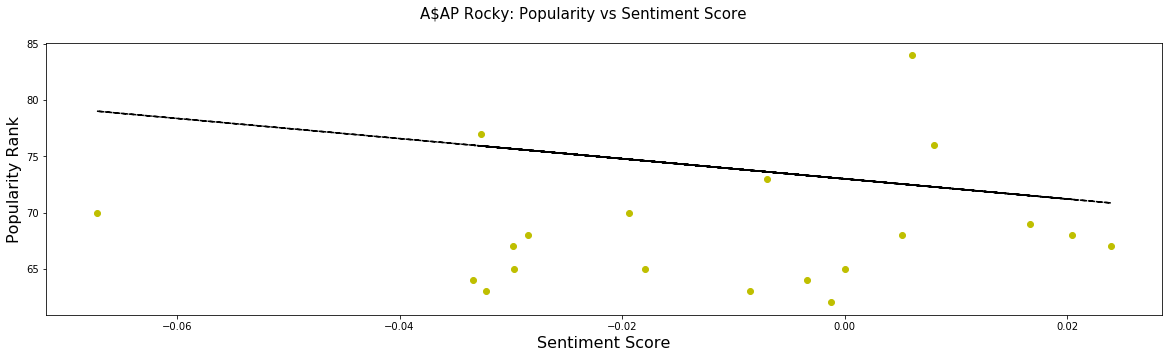

In [742]:
# print (top10)
# sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
sorted_songs_artist = sorted(top10.values(), key=lambda x: int(x["popularity"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
print (len(sorted_songs_artist))
play_count = numpy.array([x['popularity'] for x in sorted_songs_artist])
print (play_count)
# new1=numpy.delete(play_count, np.argmax(play_count))
score_count = numpy.array([x['score'] for x in sorted_songs_artist])
# new2=numpy.delete(score_count, np.argmax(score_count))
pyplot.figure(figsize=(20, 5))
# pyplot.scatter(play_count,score_count)

coef = np.polyfit(new2,new1,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

pyplot.plot(score_count,play_count, 'yo', score_count, poly1d_fn(score_count), '--k')
# plt.xlim(0, 5)
# plt.ylim(0, 12)
# pyplot.show()
# score_count
fig = pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
fig.suptitle('A$AP Rocky: Popularity vs Sentiment Score ', fontsize=15)
pyplot.xlabel('Sentiment Score', fontsize=16)
pyplot.ylabel('Popularity Rank', fontsize=16)
score_count

20
[62 63 63 64 64 65 65 65 67 67 68 68 68 69 70 70 73 76 77 84]
[0.556  0.716  0.29   0.528  0.334  0.409  0.775  0.128  0.392  0.81
 0.733  0.733  0.524  0.309  0.681  0.0568 0.307  0.335  0.66   0.294 ]


array([0.556 , 0.716 , 0.29  , 0.528 , 0.334 , 0.409 , 0.775 , 0.128 ,
       0.392 , 0.81  , 0.733 , 0.733 , 0.524 , 0.309 , 0.681 , 0.0568,
       0.307 , 0.335 , 0.66  , 0.294 ])

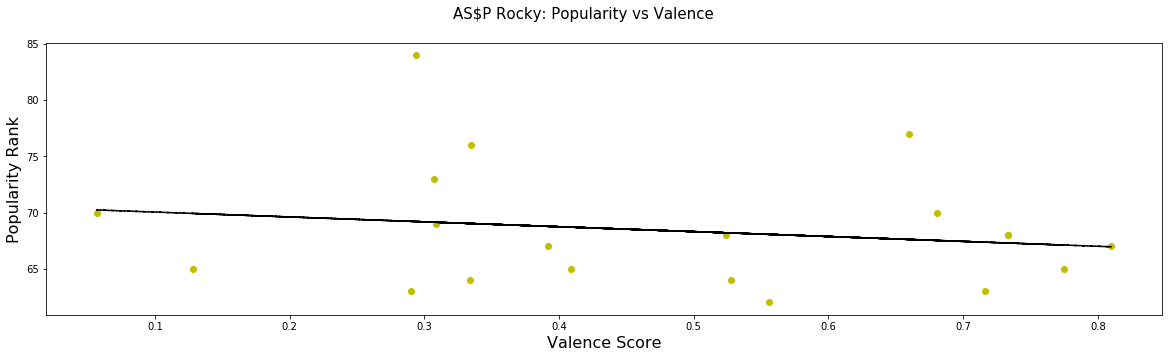

In [743]:
# print (top10)
# sorted_songs_artist = sorted(top10, key=lambda x: int(x["score"]))
sorted_songs_artist = sorted(top10.values(), key=lambda x: int(x["popularity"]))
# sorted_songs_streams = sorted(top10, key=lambda x: x["score"])
print (len(sorted_songs_artist))
play_count = numpy.array([x['popularity'] for x in sorted_songs_artist])
album = numpy.array([p["album"] for p in sorted_songs_artist])
title = numpy.array([p["title"] for p in sorted_songs_artist])

print (play_count)
score_count = numpy.array([x['valence'] for x in sorted_songs_artist])
print (score_count)

from matplotlib.pyplot import figure
# fig, ax = pyplot.subplots()
pyplot.figure(figsize=(20, 5))
# pyplot.scatter(play_count,score_count)

coef = np.polyfit(score_count,play_count,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

pyplot.plot(score_count,play_count, 'yo', score_count, poly1d_fn(score_count), '--k')
# plt.xlim(0, 5)
# plt.ylim(0, 12)

# for i in range(len(score_count)):
# #     if album[i]!=album[i-1]:
#     ax.annotate(title[i],(i,score_count[i]))
fig = pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
fig.suptitle('AS$P Rocky: Popularity vs Valence ', fontsize=15)
pyplot.xlabel('Valence Score', fontsize=16)
pyplot.ylabel('Popularity Rank', fontsize=16)
score_count

In [469]:
# sort by release date
# sorted_songs_artist = sorted(completeartist, key=lambda x: x["release_date"])
album = numpy.array([p["album"] for p in completeartist])
title = numpy.array([p["title"] for p in completeartist])

print (album)
sentiment_scores = numpy.array([p["score"] for p in completeartist])

from matplotlib.pyplot import figure
# figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pyplot.subplots()
ax.plot(sentiment_scores)
# for i in enumerate(range(len(sentiment_scores))):
#     print (i)
for i in range(len(sentiment_scores)):
#     if album[i]!=album[i-1]:
    ax.annotate(album[i],(i,sentiment_scores[i]))
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('A$AP Rocky: Sentiment over time ', fontsize=15)
pyplot.xlabel('Song by index', fontsize=16)
pyplot.ylabel('Sentiment score', fontsize=16)

{'earfquake': {'title': 'EARFQUAKE',
  'album': 'IGOR',
  'text': "For real, for real this time\nFor real, for real, for real this time\nBitch, I cannot fall short\nFor real, for real, for real this time (Yeah, yeah)\nFor real, for real, for real this time\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n'Cause you make my earth quake\nOh, you make my earth quake (Earthquake, ooh)\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n\nDon't leave, it's my fault\nDon't leave, it's my fault\nDon't leave, it's my fault (Girl)\n’Cause when it all comes crashing down I’ll need you\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, you’re telling me something is bad\nAnd it's making my heart break\n'Cause you make my earth quake, oh, you make my earth quake\n(Earth quake, yeah)\nRiding around, your love be shakin' me up\nAnd it’s making my heart break (